<a href="https://colab.research.google.com/github/laurenskie/Fall_23_Intro-To-Python-/blob/main/RIVERA_L_NYCrealESTATE_21_june_24_Project___LINEAR_REGRESSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Task 3: Load the Data

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/nyc-rolling-sales.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

##Get Data Info

In [18]:
print( data.head())

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

In [19]:
print(data.shape)  # To see the number of rows and columns
#Downsample the Dataset:

(84548, 22)


This data set is too large.  It has been making COLAB crash, I need to cut some data.

In [21]:
# Specify the number of rows to keep
sample_size = 10000
data_downsampled = data.sample(n=sample_size, random_state=42)


In [22]:
# Check the dimensions of the dataset (rows, columns)
print("Dimensions of the dataset:", data_downsampled.shape)


Dimensions of the dataset: (10000, 22)


In [23]:
#Check the names of the columns
data_downsampled.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [24]:
#check the data types; remember ML likes numbers (ints and floats)
#I will need to change some objects, strings and categories to ints and floats
#What columns can I drop that will not affect price of real estate as much?
data_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 69520 to 39656
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      10000 non-null  int64 
 1   BOROUGH                         10000 non-null  int64 
 2   NEIGHBORHOOD                    10000 non-null  object
 3   BUILDING CLASS CATEGORY         10000 non-null  object
 4   TAX CLASS AT PRESENT            10000 non-null  object
 5   BLOCK                           10000 non-null  int64 
 6   LOT                             10000 non-null  int64 
 7   EASE-MENT                       10000 non-null  object
 8   BUILDING CLASS AT PRESENT       10000 non-null  object
 9   ADDRESS                         10000 non-null  object
 10  APARTMENT NUMBER                10000 non-null  object
 11  ZIP CODE                        10000 non-null  int64 
 12  RESIDENTIAL UNITS               10000 non-null 

statistics for numerical columns

In [25]:
data_downsampled.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10292.532600,3.005600,4238.621900,371.716100,10746.61170,2.419900,0.122500,2.574300,1790.754800,1.656200
std,7085.766691,1.284264,3564.308241,643.791841,1264.05858,30.730226,0.850744,31.077974,534.505309,0.817354
min,6.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4234.000000,2.000000,1334.000000,21.000000,10305.00000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8914.500000,3.000000,3296.000000,50.000000,11210.00000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15843.250000,4.000000,6299.000000,957.000000,11357.00000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16313.000000,9099.000000,11694.00000,1844.000000,27.000000,1866.000000,2017.000000,4.000000


In [26]:
#Box plot of 'SALE PRICE' to identify outliers
#plt.figure(figsize=(8, 6))
#sns.boxplot(data['SALE PRICE'], color='green')
#plt.title('Boxplot of SALE PRICE')
#plt.xlabel('SALE PRICE')
#plt.show()

In [ ]:
# Count plot of 'BOROUGH'
#plt.figure(figsize=(8, 6))
#sns.countplot(data['BOROUGH'], palette='pastel')
#plt.title('Number of Sales by Borough')
#plt.xlabel('Borough')
#plt.ylabel('Number of Sales')
#plt.show()

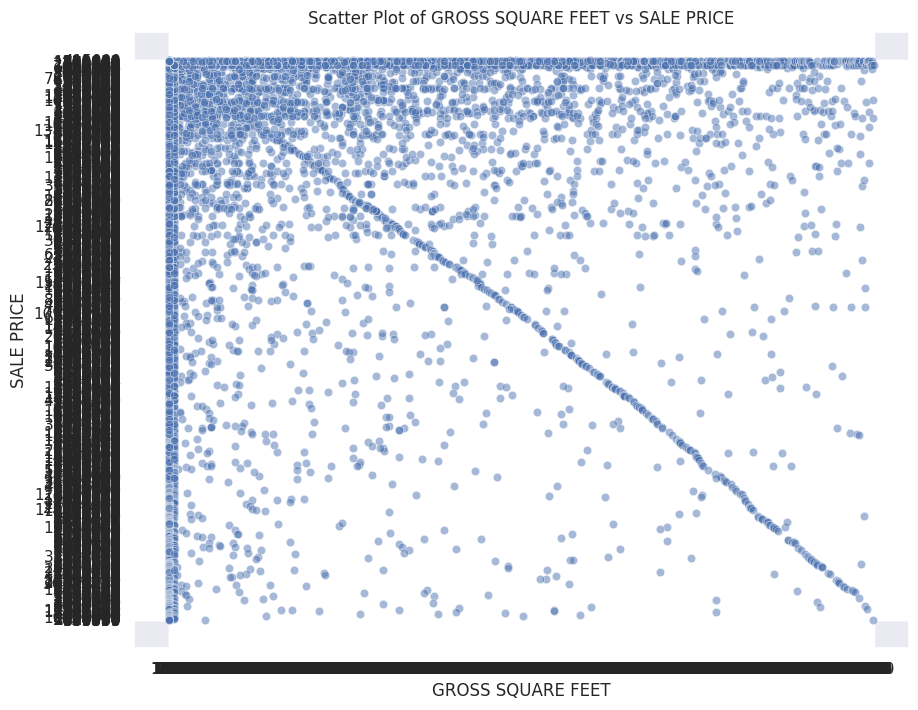

In [28]:
# Scatter plot of 'GROSS SQUARE FEET' vs 'SALE PRICE'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data_downsampled, alpha=0.5)
plt.title('Scatter Plot of GROSS SQUARE FEET vs SALE PRICE')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('SALE PRICE')
plt.show()

##Find Missing Values

In [29]:
data_downsampled.isnull().values.any()

False

In [30]:
data_downsampled.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
69520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56261,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49980,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


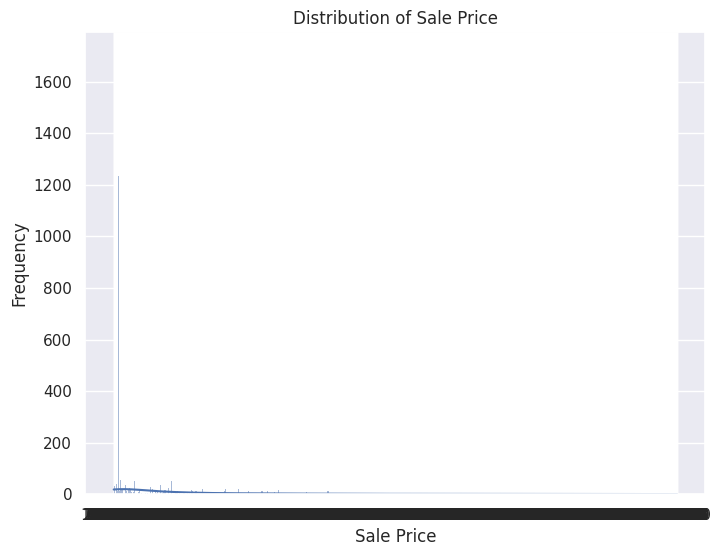

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data_downsampled['SALE PRICE'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

The reason why there is no missing data is because data that may be missing are objects; must convert to int in order to determine if there is missing data

In [32]:
#save the sample
data_downsampled.to_csv('downsampled_data.csv', index=False)


#Task 5: Perform Data Cleaning

Drop missing values for price; this is what I am trying to predict.

Convert necessary columns to integers from objects;
Use get dummies to convert categories to integers.

Convert date and price to numbers.

BUILDING CLASS CATEGORY category

BUILDING CLASS AT TIME OF SALE (category)

LAND SQUARE FEET
GROSS SQUARE FEET

NEIGHBORHOOD  (category)

SALE PRICE (convvert to int64)

SALE DATE (Get year- Convert

In [33]:
# Convert necessary columns to integers from objects
data_downsampled['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data_downsampled['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data_downsampled['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')


In [34]:
# Check the information about the dataset after conversion
print(data_downsampled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 69520 to 39656
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      10000 non-null  int64  
 1   BOROUGH                         10000 non-null  int64  
 2   NEIGHBORHOOD                    10000 non-null  object 
 3   BUILDING CLASS CATEGORY         10000 non-null  object 
 4   TAX CLASS AT PRESENT            10000 non-null  object 
 5   BLOCK                           10000 non-null  int64  
 6   LOT                             10000 non-null  int64  
 7   EASE-MENT                       10000 non-null  object 
 8   BUILDING CLASS AT PRESENT       10000 non-null  object 
 9   ADDRESS                         10000 non-null  object 
 10  APARTMENT NUMBER                10000 non-null  object 
 11  ZIP CODE                        10000 non-null  int64  
 12  RESIDENTIAL UNITS               1

CHANGE CATEGORICAL DATA TO NUMERICAL VALUES

In [35]:
##neighborhood= pd.get_dummies(data['NEIGHBORHOOD'], drop_first=True)
#building_class_at_sale= pd.get_dummies(data['BUILDING CLASS AT TIME OF SALE'], drop_first=True)
#building_category= pd.get_dummies(data['BUILDING CLASS CATEGORY'], drop_first=True)
#gross_square_feet= pd.get_dummies(data['GROSS SQUARE FEET'], drop_first=True)
##sale_price= pd.get_dummies(data['SALE PRICE'], drop_first=True)
##sale_date= pd.get_dummies(data['SALE DATE'], drop_first=True)
#easement= pd.get_dummies(data['EASE-MENT'], drop_first=True)
data_downsampled = pd.get_dummies(data_downsampled, columns=['BOROUGH'])







In [36]:
data_downsampled=pd.get_dummies(data_downsampled, columns=['NEIGHBORHOOD'])


In [38]:
#check columns
data_downsampled.columns

Index(['Unnamed: 0', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE',
       ...
       'NEIGHBORHOOD_WILLIAMSBURG-EAST', 'NEIGHBORHOOD_WILLIAMSBURG-NORTH',
       'NEIGHBORHOOD_WILLIAMSBURG-SOUTH', 'NEIGHBORHOOD_WILLOWBROOK',
       'NEIGHBORHOOD_WINDSOR TERRACE', 'NEIGHBORHOOD_WOODHAVEN',
       'NEIGHBORHOOD_WOODLAWN', 'NEIGHBORHOOD_WOODROW',
       'NEIGHBORHOOD_WOODSIDE', 'NEIGHBORHOOD_WYCKOFF HEIGHTS'],
      dtype='object', length=272)

In [39]:
data_downsampled.isnull().values.any()

True

In [40]:
# Fill in missing data (Example: filling missing 'SALE PRICE' with median)
median_sale_price = data_downsampled['SALE PRICE'].median()
data_downsampled['SALE PRICE'].fillna(median_sale_price, inplace=True)


In [41]:
# Check for missing values after filling

print(data_downsampled.isnull().sum())

Unnamed: 0                      0
BUILDING CLASS CATEGORY         0
TAX CLASS AT PRESENT            0
BLOCK                           0
LOT                             0
                               ..
NEIGHBORHOOD_WOODHAVEN          0
NEIGHBORHOOD_WOODLAWN           0
NEIGHBORHOOD_WOODROW            0
NEIGHBORHOOD_WOODSIDE           0
NEIGHBORHOOD_WYCKOFF HEIGHTS    0
Length: 272, dtype: int64


In [42]:
# Fill missing 'LAND SQUARE FEET' with mean
mean_land_square_feet = data_downsampled['LAND SQUARE FEET'].mean()
data_downsampled['LAND SQUARE FEET'].fillna(mean_land_square_feet, inplace=True)


In [43]:
#Check for missing values after filling

print(data_downsampled.isnull().sum())

Unnamed: 0                      0
BUILDING CLASS CATEGORY         0
TAX CLASS AT PRESENT            0
BLOCK                           0
LOT                             0
                               ..
NEIGHBORHOOD_WOODHAVEN          0
NEIGHBORHOOD_WOODLAWN           0
NEIGHBORHOOD_WOODROW            0
NEIGHBORHOOD_WOODSIDE           0
NEIGHBORHOOD_WYCKOFF HEIGHTS    0
Length: 272, dtype: int64


In [44]:
data_downsampled.isnull().values.any()

True

In [45]:
columns_to_drop = ['Unnamed: 0', 'TAX CLASS AT PRESENT', 'EASE-MENT',
                   'BUILDING CLASS AT TIME OF SALE', 'LOT',
                   'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER', 'ADDRESS']

for col in columns_to_drop:
    if col not in data_downsampled.columns:  # Check if column DOESN'T exist
        print(f"Column '{col}' not found in DataFrame.")

In [46]:
#Check to see if unnecessary columns have been dropped
data_downsampled.head()

,Unnamed: 0,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,NEIGHBORHOOD_WILLIAMSBURG-EAST,NEIGHBORHOOD_WILLIAMSBURG-NORTH,NEIGHBORHOOD_WILLIAMSBURG-SOUTH,NEIGHBORHOOD_WILLOWBROOK,NEIGHBORHOOD_WINDSOR TERRACE,NEIGHBORHOOD_WOODHAVEN,NEIGHBORHOOD_WOODLAWN,NEIGHBORHOOD_WOODROW,NEIGHBORHOOD_WOODSIDE,NEIGHBORHOOD_WYCKOFF HEIGHTS
69520,20122,10 COOPS - ELEVATOR APARTMENTS,2,2093,245,,D4,"6155 98TH STREET, 1D",,11374,...,False,False,False,False,False,False,False,False,False,False
76927,793,02 TWO FAMILY DWELLINGS,1,1644,31,,B9,8 ZECK COURT,,10314,...,False,False,False,False,False,False,False,False,False,False
82052,5918,01 ONE FAMILY DWELLINGS,1,4399,184,,A2,289 WILDER AVENUE,,10306,...,False,False,False,False,False,False,False,False,False,False
56261,6863,01 ONE FAMILY DWELLINGS,1,5204,41,,A2,45-45 SMART STREET,,11355,...,False,False,False,False,False,False,False,False,False,False
61503,12105,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,"27110 GRAND CENTRAL PARKWA, 2C",,11005,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Check for missing data in each column
missing_data = data_downsampled.isnull().sum()

print("Columns with missing data:")
print(missing_data[missing_data > 0])

Columns with missing data:
GROSS SQUARE FEET    3302
dtype: int64


In [48]:
# Fill in missing data
median_gross_square_feet = data_downsampled['GROSS SQUARE FEET'].median()
data_downsampled['GROSS SQUARE FEET'].fillna(median_gross_square_feet, inplace=True)

In [49]:
# Check for missing data in each column
missing_data = data_downsampled.isnull().sum()

print("Columns with missing data:")
print(missing_data[missing_data > 0])

Columns with missing data:
Series([], dtype: int64)


In [50]:
# Identify columns with missing data
columns_with_missing = missing_data[missing_data > 0].index.tolist()

# Drop rows where any of the specified columns have missing data
data_clean = data_downsampled.dropna(subset=columns_with_missing)

# Display information about the cleaned DataFrame
print(f"Original DataFrame shape: {data_downsampled.shape}")
print(f"Cleaned DataFrame shape: {data_clean.shape}")

Original DataFrame shape: (10000, 272)
Cleaned DataFrame shape: (10000, 272)


In [51]:
# reCheck for missing data in each column
missing_data = data_clean.isnull().sum()

print("Columns with missing data:")
print(missing_data[missing_data > 0])

Columns with missing data:
Series([], dtype: int64)


In [52]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 69520 to 39656
Columns: 272 entries, Unnamed: 0 to NEIGHBORHOOD_WYCKOFF HEIGHTS
dtypes: bool(252), float64(3), int64(9), object(8)
memory usage: 4.0+ MB


In [53]:
#what columns are still objects?
object_columns = data_clean.select_dtypes(include=['object']).columns

# Print the columns of type 'object'
print("Columns of type 'object':")
for col in object_columns:
    print(col)

Columns of type 'object':
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
BUILDING CLASS AT TIME OF SALE
SALE DATE


In [54]:
#I need to drop columns that are objects and unnecesary.
columns_to_drop2 = ['BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT',
                   'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE','SALE DATE']

for col in columns_to_drop2:
    if col not in data_clean.columns:  # Check if column DOESN'T exist
        print(f"Column '{col}' not found in DataFrame.")


In [56]:
#what columns are still objects?
object_columns = data_clean.select_dtypes(include=['object']).columns

# Print the columns of type 'object'
print("Columns of type 'object':")
for col in object_columns:
    print(col)

Columns of type 'object':
BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT
EASE-MENT
BUILDING CLASS AT PRESENT
ADDRESS
APARTMENT NUMBER
BUILDING CLASS AT TIME OF SALE
SALE DATE


In [57]:
# List of columns to drop
columns_to_drop = [
    'BUILDING CLASS CATEGORY',
    'TAX CLASS AT PRESENT',
    'EASE-MENT',
    'BUILDING CLASS AT PRESENT',
    'ADDRESS',
    'APARTMENT NUMBER',
    'BUILDING CLASS AT TIME OF SALE',
    'SALE DATE']

    # Drop columns
data_clean.drop(columns=columns_to_drop, inplace=True)



In [58]:
# Print first few rows to verify
print(data.head())

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

## **NOW USE data_clean**
for the training and testing

In [59]:
# Check for missing data in each column
#missing_data = data2.isnull().sum()

print("Columns with missing data:")
print(missing_data[missing_data > 0])

Columns with missing data:
Series([], dtype: int64)


#Task 6: Visualize Cleaned up Dataset

<Axes: >

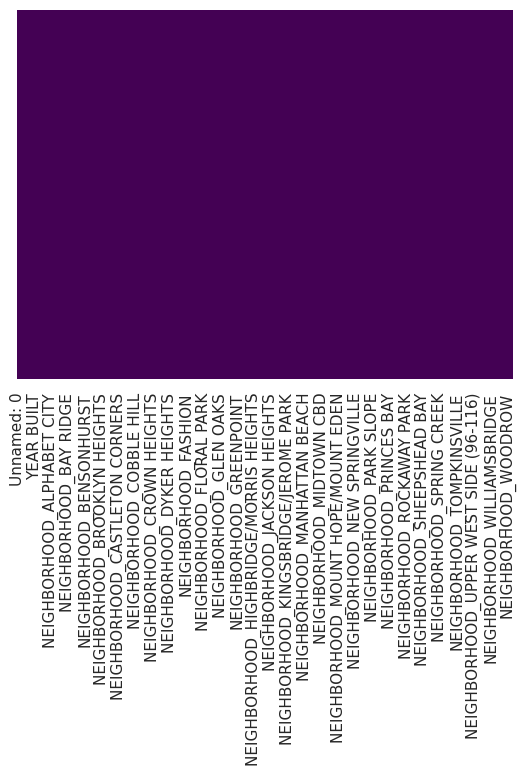

In [60]:
sns.heatmap(data_clean.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Task 7: Conceptualize the problem

Predciting the price of real estate based on various factors


#Task 8: Perform Data-Split

In [61]:
X = data_clean.drop('SALE PRICE', axis=1)  # Features
y = data_clean['SALE PRICE']  # Target variable

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop('SALE PRICE',axis=1), data_clean['SALE PRICE'], test_size=0.25, random_state=101) # X --> df.drop('Survived',axis=1), Y --> df['Survived'

In [63]:
# Print shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7500, 263)
Shape of X_test: (2500, 263)
Shape of y_train: (7500,)
Shape of y_test: (2500,)


#Task 9: Choose the ML Method to follow

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#Task 10: Train the ML Model

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Task 11: Test the Model

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.23      0.71      0.35       316
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00        18
       100.0       0.00      0.00      0.00         4
       500.0       0.00      0.00      0.00         3
     10000.0       0.00      0.00      0.00         2
     11750.0       0.00      0.00      0.00         1
     15000.0       0.00      0.00      0.00         1
     17480.0       0.00      0.00      0.00         1
     20000.0       0.00      0.00      0.00         3
     23215.0       0.00      0.00      0.00         1
     24000.0       0.00      0.00      0.00         2
     25355.0       0.00      0.00      0.00         1
     29795.0       0.00      0.00      0.00         1
     30000.0       0.00      0.00      0.00         1
     35000.0       0.00      0.00      0.00         3
     35044.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [69]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("SALE PRICE", sum(pp!=0))
print("NOT SALE PRICE", sum(pp==0))

0.2196
SALE PRICE 1524
NOT SALE PRICE 976


In [71]:
# Visualize training set
plt.scatter(X_train, Y_train, color = "red", label="Living Area")
plt.title("REAL ESTATE Prices in NYC")
plt.plot(X_train, regressor.predict(X_train), color = "blue", label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

NameError: name 'Y_train' is not defined

### Making Predictions

In [70]:
y_pred = regressor.predict(X_test)

NameError: name 'regressor' is not defined